# 18기 KNN 정규세션 과제

## KNN 구현해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. KNN 구현 & 파라미터 튜닝
수업 내용 및 실습 자료를 참고하여 KNN을 구현하고 파라미터 튜닝을 하며 결과를 비교해주세요.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [blackfriday | Kaggle](https://www.kaggle.com/llopesolivei/blackfriday)

---

## 0. 데이터 불러오기

In [1]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive/MyDrive/투빅스/과제

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/투빅스/과제


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-white')
sns.set_style("whitegrid")

%matplotlib inline

In [3]:
df = pd.read_csv("blackfriday.csv", index_col = 0)
print(df.shape)
df.head()

(4998, 12)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,NaN,5780


## 1. Preprocssing / EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     4998 non-null   int64  
 1   Product_ID                  4998 non-null   object 
 2   Gender                      4998 non-null   object 
 3   Age                         4998 non-null   object 
 4   Occupation                  4998 non-null   int64  
 5   City_Category               4998 non-null   object 
 6   Stay_In_Current_City_Years  4998 non-null   object 
 7   Marital_Status              4998 non-null   int64  
 8   Product_Category_1          4998 non-null   int64  
 9   Product_Category_2          3465 non-null   float64
 10  Product_Category_3          1544 non-null   float64
 11  Purchase                    4998 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 507.6+ KB


In [5]:
# 결측치 비율 확인
df.isnull().sum()/len(df)

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.306723
Product_Category_3            0.691076
Purchase                      0.000000
dtype: float64

In [6]:
df.describe(include='number')

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,4.998000e+03,4998.000000,4998.000000,4998.000000,3465.000000,1544.000000,4998.000000
mean,1.003015e+06,8.036815,0.421369,5.320128,9.773737,12.766839,9234.655462
std,1.709910e+03,6.442697,0.493828,3.912281,5.101867,4.023591,4999.225081
min,1.000003e+06,0.000000,0.000000,1.000000,2.000000,3.000000,13.000000
25%,1.001560e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5497.750000
50%,1.003040e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8049.000000
75%,1.004417e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12039.000000
max,1.006037e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23913.000000


In [7]:
df.describe(include='O')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,4998,4998,4998,4998,4998
unique,1797,2,7,3,5
top,P00265242,M,26-35,B,1
freq,21,3765,1996,2102,1758


In [8]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

**[Feature Description]**
* Numerical 
  * `Purchase` : 구매량
* Categorical   
  * `User_ID` : 사용자 ID
  * `Product_ID` : 제품 ID
  * `Gender` : 성별
  * `Age` : 나이
  * `Occupation` : 직업
  * `City Category` : 도시 구분
  * `Stay In Current City Years` : 현재 도시 거주 기간
  * `Marital Status` : 결혼 여부 (0: 미혼, 1: 기혼)
  * `Product Category 1~3` : 제품 카테고리 구분 
<br></br>

* 12개의 변수 중 1개(`Purchase`)를 제외하고는 사실상 전부 Categorical 변수
* `Product_Category_2`,`Product_Category_3`의 경우 결측치의 비율이 높아 모델 학습에 사용하지 않는 것이 적절하다고 판단
* Target 변수로 Purchase(KNN Regression) 또는 Gender(KNN Classification)이 적당하다고 판단
  * Target 변수로 *Gender* 선택


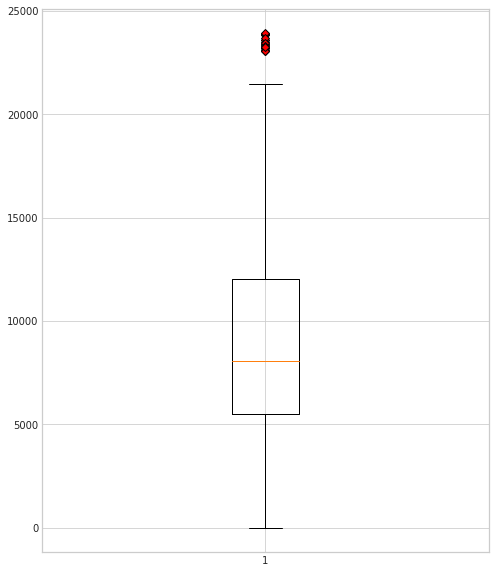

In [9]:
# 이상치 시각화
plt.figure(figsize=(8, 10))
plt.boxplot(df['Purchase'], flierprops = dict(markerfacecolor = 'r', marker = 'D'))
plt.show()

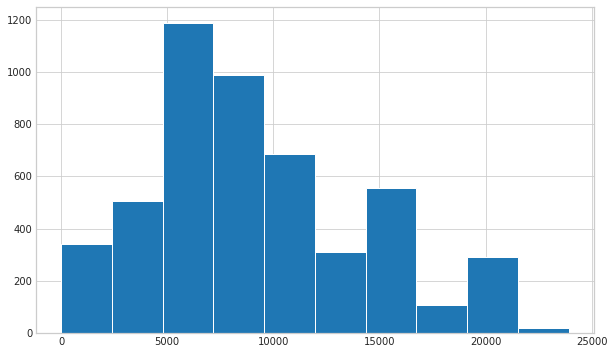

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(df['Purchase'])
plt.show()

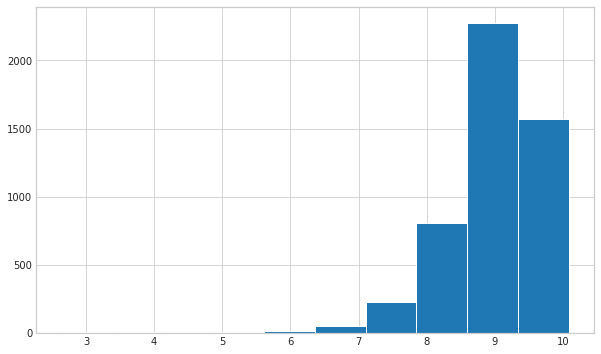

In [11]:
# numerical 변수 => log 변환을 통해 scale 조정
df['Purchase'] = np.log1p(df['Purchase'])

plt.figure(figsize=(10, 6))
plt.hist(df['Purchase'])
plt.show()

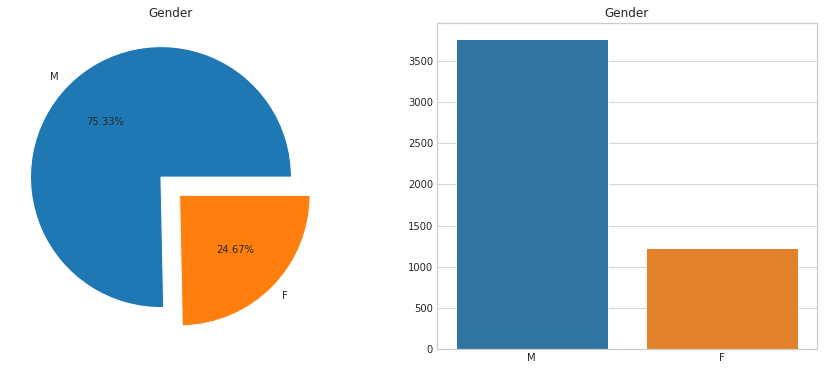

In [12]:
# taregt 분포 확인
target = 'Gender'

f, ax = plt.subplots(1, 2, figsize=(15,6))
df[target].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',ax=ax[0])
ax[0].set_title(target)
ax[0].set_ylabel(None)
sns.barplot(data = df[target].value_counts().reset_index(), x = 'index', y = target)
ax[1].set_title(target)
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
plt.show()

In [13]:
df[target].value_counts()
# 남성 3, 여성 1 정도의 비율

M    3765
F    1233
Name: Gender, dtype: int64

In [14]:
# 타겟 데이터셋 분리
X = df.drop(target, axis = 1)
y = df[target]

In [15]:
y

0       F
1       F
2       F
3       F
4       F
       ..
4993    M
4994    M
4995    M
4996    M
4997    M
Name: Gender, Length: 4998, dtype: object

In [16]:
# 불필요 Column 제거
X.drop(columns=['User_ID', 'Product_ID', 'Product_Category_2', 'Product_Category_3'], inplace = True)

# Categorical 변수 => 원핫인코딩
X = X.astype({'Occupation':'O', 'Marital_Status':'O', 'Product_Category_1':'O'}) # 타입 변환
X = pd.get_dummies(X)
X.head()

,Purchase,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Occupation_0,Occupation_1,...,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Product_Category_1_19,Product_Category_1_20
0,7.606387,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.408271,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8.948586,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9.706864,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.662332,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Train, Test 데이터셋 생성 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y ,random_state=42)

print(X_train.shape, X_test.shape)

(3998, 59) (1000, 59)


In [18]:
# 타겟 분포 확인
print(len(y_train))
y_train.value_counts(normalize=True)

3998


M    0.753377
F    0.246623
Name: Gender, dtype: float64

In [19]:
print(len(y_train))
y_test.value_counts(normalize=True)

3998


M    0.753
F    0.247
Name: Gender, dtype: float64

## 2. KNN 구현 & 파라미터 튜닝

In [20]:
# 모델 생성 & 학습 
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()    
knn.fit(X_train, y_train)
print(f'Test  : {knn.score(X_test, y_test)}')

Test  : 0.758


In [21]:
#모델 성능 평가
from sklearn.metrics import classification_report

print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           F       0.52      0.28      0.37       247
           M       0.80      0.91      0.85       753

    accuracy                           0.76      1000
   macro avg       0.66      0.60      0.61      1000
weighted avg       0.73      0.76      0.73      1000



In [22]:
# 파라미터 튜닝 
train_accuracy = []
test_accuracy = []

for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors = k)    
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))     
    test_accuracy.append(knn.score(X_test, y_test))   

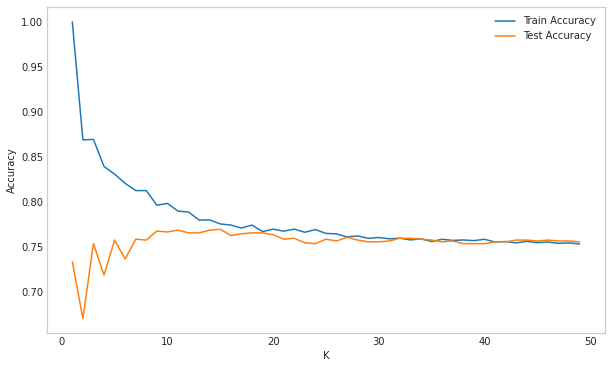

In [23]:
# Accuracy 시각화
plt.figure(figsize=(10, 6))

plt.plot(range(1, 50), train_accuracy, label = "Train Accuracy")
plt.plot(range(1, 50), test_accuracy, label = "Test Accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()
plt.show()

K를 변화시키면서 Train Data, Test Data에 대한 정확도(Accuracy)를 확인
* Train Data :  K가 커질수록 정확도가 떨어짐
* Test Data : K가 커질수록 정확도가 높아짐
* 정확도  0.76 정도에서 수렴

## 3. Evaluation

In [24]:
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train, y_train)
print(f'Test  : {knn.score(X_test, y_test)}')

Test  : 0.764


In [25]:
#모델 성능 평가
from sklearn.metrics import classification_report

print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           F       0.61      0.12      0.20       247
           M       0.77      0.97      0.86       753

    accuracy                           0.76      1000
   macro avg       0.69      0.55      0.53      1000
weighted avg       0.73      0.76      0.70      1000



* 성능 향상 